In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
!nvidia-smi

Sun Mar 28 03:38:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Sunny-or-Cloudy/data.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Sunny-or-Cloudy/data.zip
replace test/cloudy/c001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
import os
import random

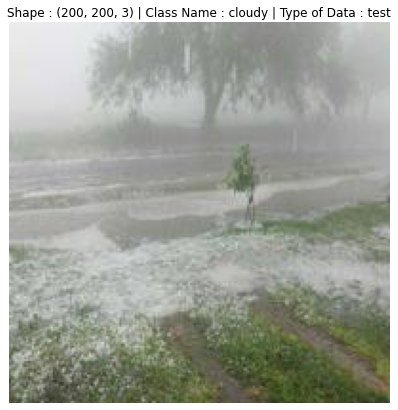

In [7]:
type_of_data = random.choice(['train','test'])
type_of_class = random.choice(['sunny','cloudy'])
file_name = random.choice(os.listdir(f'{type_of_data}/{type_of_class}/'))
img = mpimg.imread(f'{type_of_data}/{type_of_class}/{file_name}')
img = img / 255.0
plt.figure(figsize=(10,7))
plt.imshow(img)
plt.axis(False)
plt.title(f'Shape : {img.shape} | Class Name : {type_of_class} | Type of Data : {type_of_data}')
plt.show();

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.75)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [10]:
test_data = test_datagen.flow_from_directory('test/',target_size=(224,224),class_mode='binary')
train_data = train_datagen.flow_from_directory('train/',target_size=(224,224),class_mode='binary')

Found 253 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Modelling

In [16]:
models_to_try = [
    # ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
    # ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
    # ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
    # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
    # ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
    # ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
    # ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
    # ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
    # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    # ['amiebanet_a_n18_f448','https://tfhub.dev/google/imagenet/amoebanet_a_n18_f448/feature_vector/1'],
    # ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
    # ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
    # ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    # ['nasnet_large','https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4'],
    # ['nasnet_mobile','https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4']
]

In [17]:
!pip3 install wandb

In [18]:
import wandb
from wandb.keras import *

In [20]:
# for model_to_try in models_to_try:
#   print('-'*100)
#   print(model_to_try[0])
#   print('-'*100)
#   wandb.init(project="Sunny-or-Cloudy",name=f"{model_to_try[0]}-0")
#   model = tf.keras.Sequential([
#     hub.KerasLayer(model_to_try[1],input_shape=(224,224,3)),
#     tf.keras.layers.Dense(1,activation='sigmoid')
#   ])
#   model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#   model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])

In [ ]:
!nvidia-smi

## Results

#### Best `loss` = resnet50
#### Best `val loss` = resnet_v1_101 / resnet50 / efficentnetb1
#### Best `accuracy` = resnet50
#### Best `val accuracy` = resnet50


In [21]:
# resnet50 wins !!

In [24]:
model_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
wandb.init(project="Sunny-or-Cloudy",name=f"resnet-big-dog-model")
model = tf.keras.Sequential([
  hub.KerasLayer(model_url,input_shape=(224,224,3)),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(test_data),epochs=100,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5)])
model.save('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Sunny-or-Cloudy/model-1.h5')

epoch,5
loss,0.27924
accuracy,0.8831
val_loss,0.57337
val_accuracy,0.78656
_runtime,729
_timestamp,1616909903
_step,5
best_val_loss,0.42373
best_epoch,3


epoch,▁▂▄▅▇█
loss,█▃▂▂▁▁
accuracy,▁▆▇███
val_loss,█▄▄▁▅▇
val_accuracy,▁▄▆█▅▅
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


Epoch 1/100
313/313 [==============================] - 123s 377ms/step - loss: 0.5852 - accuracy: 0.6802 - val_loss: 0.4147 - val_accuracy: 0.8103
Epoch 2/100
313/313 [==============================] - 119s 381ms/step - loss: 0.3564 - accuracy: 0.8444 - val_loss: 0.4340 - val_accuracy: 0.8024
Epoch 3/100
313/313 [==============================] - 117s 374ms/step - loss: 0.3199 - accuracy: 0.8657 - val_loss: 0.3860 - val_accuracy: 0.8458
Epoch 4/100
313/313 [==============================] - 118s 376ms/step - loss: 0.3078 - accuracy: 0.8714 - val_loss: 0.3865 - val_accuracy: 0.8340
Epoch 5/100
313/313 [==============================] - 117s 373ms/step - loss: 0.2906 - accuracy: 0.8773 - val_loss: 0.4466 - val_accuracy: 0.8024
Epoch 6/100
313/313 [==============================] - 117s 374ms/step - loss: 0.2693 - accuracy: 0.8897 - val_loss: 0.3882 - val_accuracy: 0.8458
Epoch 7/100
313/313 [==============================] - 116s 372ms/step - loss: 0.2765 - accuracy: 0.8849 - val_loss: 0

In [42]:
imgs = os.listdir('/content/testing-imgs')

In [43]:
imgs

['download (16).jpeg',
 'download (14).jpeg',
 'WhatsApp Image 2021-03-28 at 11.29.02 (1).jpeg',
 'download (15).jpeg',
 'download (13).jpeg',
 'download (10).jpeg',
 'download (17).jpeg',
 'download (11).jpeg',
 'WhatsApp Image 2021-03-28 at 11.29.02.jpeg',
 'download (12).jpeg',
 'download (9).jpeg']

In [57]:
class_names = ['cloudy','sunny']

In [58]:
class_names

['cloudy', 'sunny']

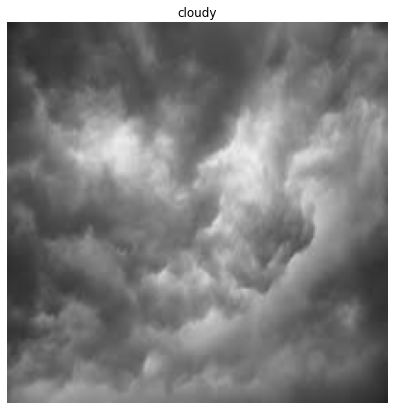

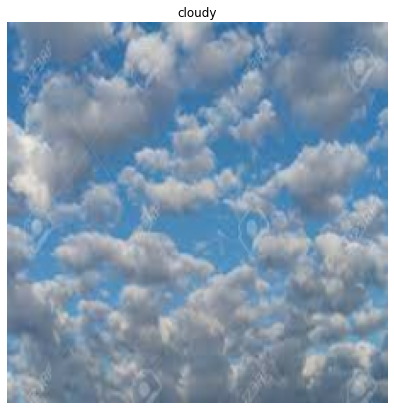

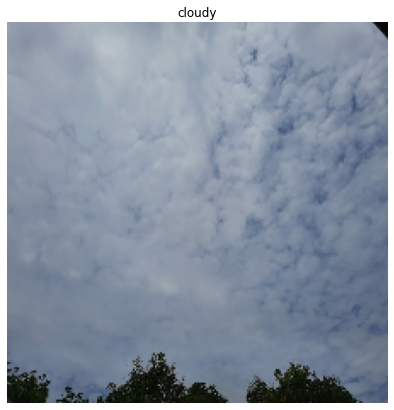

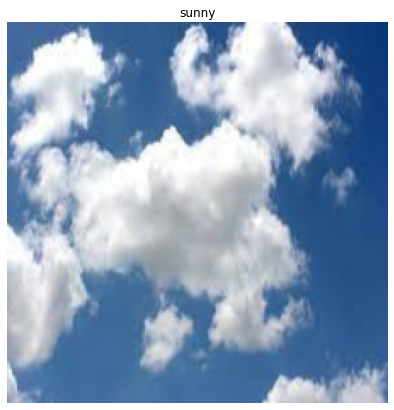

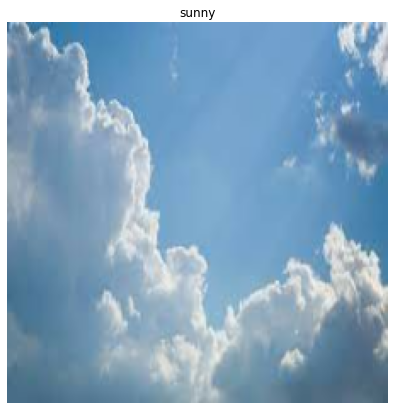

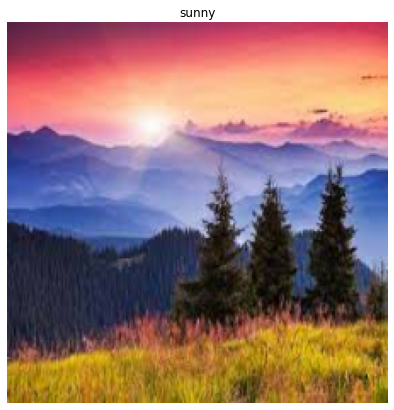

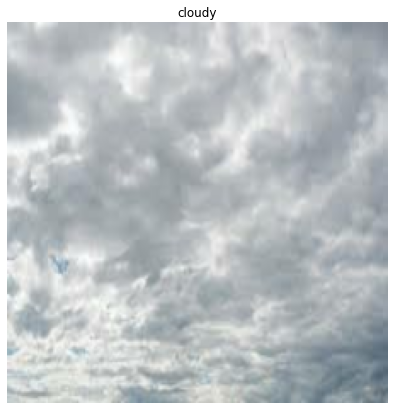

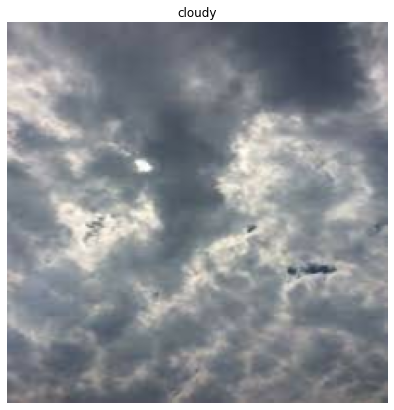

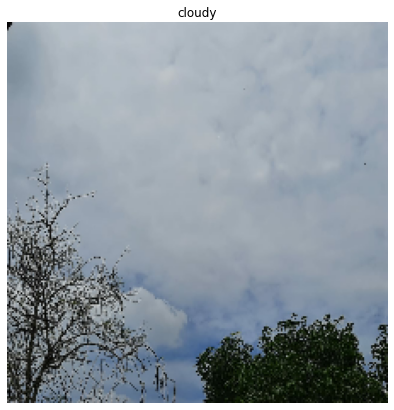

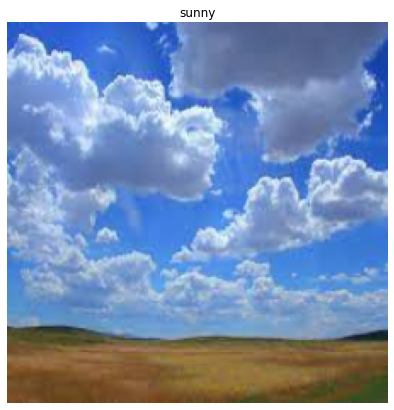

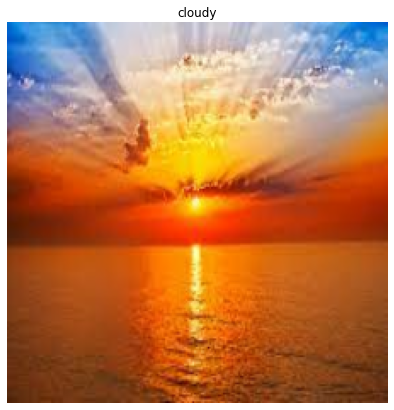

In [59]:
for img in imgs:
  img = tf.io.read_file(f'/content/testing-imgs/{img}')
  img = tf.io.decode_jpeg(img)
  img = tf.image.resize(size=(224,224),images=img)
  img = img / 255.0
  preds = model.predict(tf.expand_dims(img,axis=0))
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'{class_names[int(tf.squeeze(tf.round(preds)))]}')
  plt.show();